In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
from collections import defaultdict
import seaborn as sns

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

### Helper Functions

In [4]:
def get_non_null_element(column, i):
    count = 0
    while True:
        try:
            random_index = np.random.randint(0, len(column))
            element = column[random_index]
        except:
            continue
        if not pd.isnull(element) and element != "0":
            print(element)
            count+=1
            if count>=i:
                break

In [51]:
def plot_top_keywords(data, n, ngram_range=(1, 1), stop_words='english', plot_color='blue'):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words=stop_words, min_df=2)
    X = vectorizer.fit_transform(data)
    feature_names = vectorizer.get_feature_names_out()
    counts = X.sum(axis=0)
    sorted_counts = sorted(zip(feature_names, counts.flat), key=lambda x: x[1], reverse=True)
    top_n = dict(sorted_counts[:n])
    
    plt.figure(figsize=(12, 6))
    plt.bar(top_n.keys(), top_n.values(), color=plot_color)
    plt.title(f'Top {n} {ngram_range}-grams in Overviews')
    plt.xlabel(f'{ngram_range}-grams')
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Metadata Analysis

In [39]:
df_meta = pd.read_csv("../Data/movies_metadata.csv", low_memory=True)

In [40]:
df_meta.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


In [41]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [42]:
df_meta.isna().sum()

adult                        0
belongs_to_collection    40972
budget                       0
genres                       0
homepage                 37684
id                           0
imdb_id                     17
original_language           11
original_title               0
overview                   954
popularity                   5
poster_path                386
production_companies         3
production_countries         3
release_date                87
revenue                      6
runtime                    263
spoken_languages             6
status                      87
tagline                  25054
title                        6
video                        6
vote_average                 6
vote_count                   6
dtype: int64

In [43]:
df_meta.drop(columns=['budget', 'revenue', 'homepage', 'status', 'imdb_id'], inplace=True)

### adult

In [44]:
df_meta['adult'].unique()

array(['False', 'True', ' - Written by Ørnås',
       ' Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.',
       ' Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.'],
      dtype=object)

In [45]:
df_meta['adult'].value_counts()

adult
False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: count, dtype: int64

In [46]:
df_meta = df_meta[df_meta['adult'].isin(['True', 'False'])]

### belongs_to_collection

In [47]:
df_meta['belongs_to_collection'].count()

4491

In [48]:
get_non_null_element(df_meta['belongs_to_collection'], 1)

{'id': 473843, 'name': 'Stake Land Collection', 'poster_path': '/xAwBPbxAlDnSqhHoDNGNXcsTpIO.jpg', 'backdrop_path': '/ejgCF5HlsM3FwxdgzdoEJ7tFN3C.jpg'}


In [49]:
collection_counts = defaultdict(int)

for element in df_meta['belongs_to_collection']:

    if not pd.isnull(element):
        try:
            collection_info = ast.literal_eval(element)
            name = collection_info['name']
            collection_counts[name] += 1
        except Exception as e:
            print(f"Error processing element: {e}")

collection_counts_dict = dict(collection_counts)

In [50]:
print("Total Unique Collections: ", len(collection_counts_dict))

Total Unique Collections:  1695


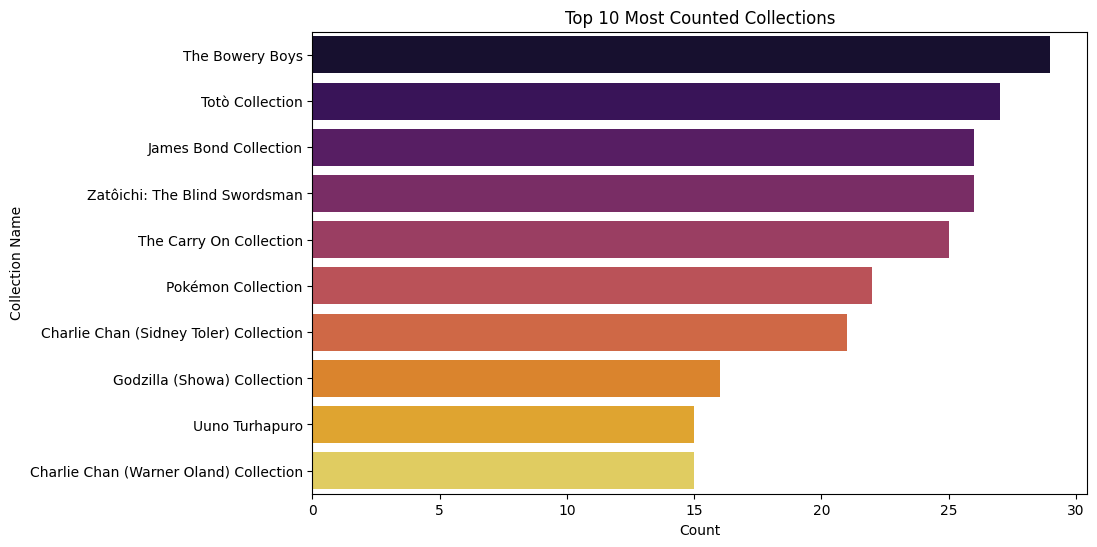

In [51]:
top_10_collections = dict(sorted(collection_counts_dict.items(), key=lambda item: item[1], reverse=True)[:10])

names = list(top_10_collections.keys())
counts = list(top_10_collections.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=counts, y=names, palette='inferno')
plt.xlabel('Count')
plt.ylabel('Collection Name')
plt.title('Top 10 Most Counted Collections')
plt.show()

In [52]:
del element, collection_counts, top_10_collections, name, collection_info, names, counts

### genres

In [53]:
get_non_null_element(df_meta['genres'], 3)

[{'id': 18, 'name': 'Drama'}]
[{'id': 99, 'name': 'Documentary'}]
[{'id': 35, 'name': 'Comedy'}, {'id': 10751, 'name': 'Family'}, {'id': 12, 'name': 'Adventure'}]


In [54]:
for i, row in df_meta.iterrows():
    genres_final = []
    genres_list = ast.literal_eval(row['genres'])
    for genre_dict in genres_list:
        genres_final.append(genre_dict['name'])
    df_meta.at[i, 'genres'] = genres_final

In [55]:
df_meta['genres'].head(5)

0     [Animation, Comedy, Family]
1    [Adventure, Fantasy, Family]
2               [Romance, Comedy]
3        [Comedy, Drama, Romance]
4                        [Comedy]
Name: genres, dtype: object

In [56]:
genre_frequencies = defaultdict(int)

for genres_list in df_meta['genres']:
    for genre in genres_list:
        genre_frequencies[genre] += 1

genre_frequency_dict = dict(genre_frequencies)

In [57]:
print("Total number of unique genres: ", len(genre_frequency_dict))

Total number of unique genres:  20


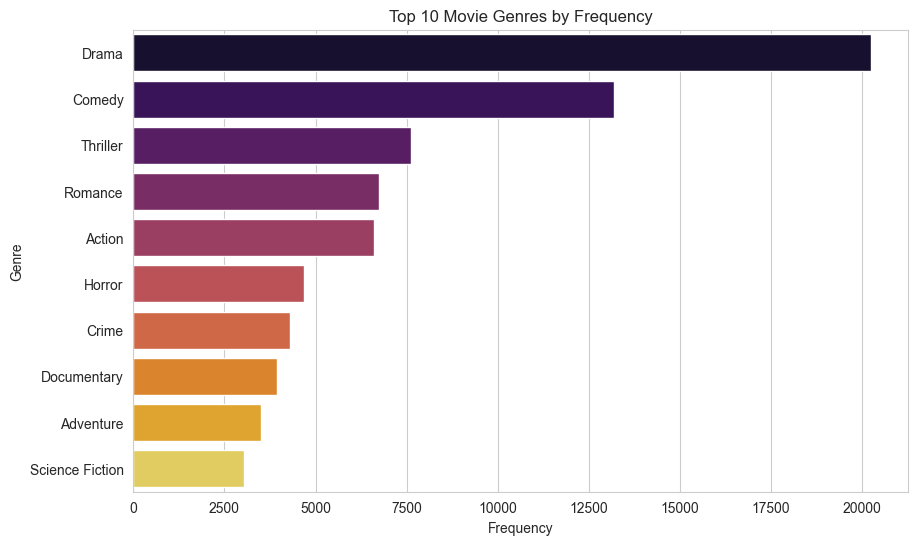

In [154]:
genre_frequency_df = pd.DataFrame(list(genre_frequency_dict.items()), columns=['Genre', 'Frequency'])

genre_frequency_df = genre_frequency_df.sort_values(by='Frequency', ascending=False)

top_10_genres = genre_frequency_df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Genre', data=top_10_genres, palette='inferno')
plt.xlabel('Frequency')
plt.ylabel('Genre')
plt.title('Top 10 Movie Genres by Frequency')
plt.show()

In [59]:
del genre_frequency_df, genre_frequencies, genres_list, genres_final, genre, genre_dict, top_10_genres
del i, row

### original_language

In [61]:
get_non_null_element(df_meta['original_language'], 5)

it
nl
en
en
ko


In [66]:
df_meta['original_language'].value_counts()

original_language
en    32269
fr     2438
it     1529
ja     1350
de     1080
      ...  
ay        1
rw        1
cy        1
tg        1
si        1
Name: count, Length: 89, dtype: int64

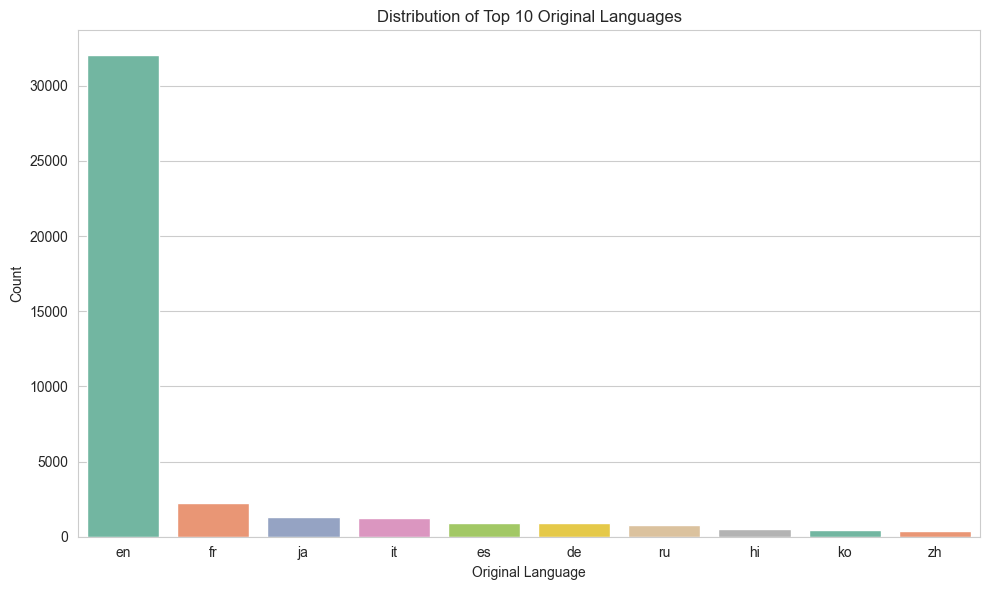

In [153]:
top_10_languages = df_meta['original_language'].value_counts().head(10).index

df_top_10_languages = df_meta[df_meta['original_language'].isin(top_10_languages)]

sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sns.countplot(x='original_language', data=df_top_10_languages, palette='Set2', order=top_10_languages)
plt.xlabel('Original Language')
plt.ylabel('Count')
plt.title('Distribution of Top 10 Original Languages')
# plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [129]:
del top_10_languages, df_top_10_languages

### id

In [79]:
get_non_null_element(df_meta['id'], 5)

42217
173805
4464
254123
779


In [76]:
df_meta['id'].duplicated().sum()

30

In [78]:
df_meta.drop_duplicates(subset=['id'], keep='first', inplace=True)

### original_title

In [83]:
get_non_null_element(df_meta['original_title'], 5)

The St  Francisville Experiment
Cropsey
Lone Star
Baseball
Saving Grace


In [86]:
df_meta['original_title'].duplicated().sum()

2062

In [87]:
duplicated_titles = df_meta[df_meta.duplicated(subset=['original_title'], keep=False)]

In [90]:
duplicated_titles['original_title'].value_counts()

original_title
Hamlet                     8
Alice in Wonderland        8
Macbeth                    7
The Three Musketeers       7
A Christmas Carol          7
                          ..
Oklahoma!                  2
Pride and Prejudice        2
Cyrano de Bergerac         2
怪談                         2
Долгая счастливая жизнь    2
Name: count, Length: 1638, dtype: int64

In [91]:
duplicated_titles.loc[duplicated_titles['original_title'] == "Alice in Wonderland"]

,adult,belongs_to_collection,genres,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,tagline,title,video,vote_average,vote_count
1003,False,NaN,"[Animation, Adventure, Family, Fantasy]",12092,en,Alice in Wonderland,"On a golden afternoon, young Alice follows a W...",16.488937,/9gJa2B6M8jt85aDkb0MF98MLZ9T.jpg,"[{'name': 'RKO Radio Pictures', 'id': 6}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1951-07-03,75.0,"[{'iso_639_1': 'en', 'name': 'English'}]",A world of wonders in One Great Picture,Alice in Wonderland,False,7.0,1557.0
9665,False,NaN,"[Fantasy, Family]",30923,en,Alice in Wonderland,Alice follows a white rabbit down a rabbit-hol...,8.614303,/c53p3QRI0BNx7KE1zH8fXoWq4sM.jpg,"[{'name': 'NBC', 'id': 1502}, {'name': 'Hallma...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1999-02-28,150.0,"[{'iso_639_1': 'en', 'name': 'English'}]",A Masterpiece of Imagination...,Alice in Wonderland,False,6.1,71.0
11887,False,NaN,"[Family, Fantasy]",34573,en,Alice in Wonderland,Classic tale of a girl named Alice who follows...,3.794133,/1jlw8lSaLetDP4XqioTgK6R38Lt.jpg,"[{'name': 'Irwin Allen Productions', 'id': 140...","[{'iso_3166_1': 'US', 'name': 'United States o...",1985-12-09,187.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Alice in Wonderland,False,6.3,15.0
14892,False,"{'id': 261307, 'name': 'Alice in Wonderland Co...","[Family, Fantasy, Adventure]",12155,en,Alice in Wonderland,"Alice, an unpretentious and individual 19-year...",17.285093,/pvEE5EN5N1yjmHmldfL4aJWm56l.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2010-03-03,108.0,"[{'iso_639_1': 'en', 'name': 'English'}]",You're invited to a very important date.,Alice in Wonderland,False,6.4,4773.0
15868,False,NaN,"[Action, Adventure, Family, Fantasy, Science F...",25694,en,Alice in Wonderland,"On a boring winter afternoon, Alice dreams, th...",1.504355,/hA536GMozYb9zbMjo2NqESniveU.jpg,"[{'name': 'Paramount Pictures', 'id': 4}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1933-12-22,76.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Entertainment Miracle Of All Times!,Alice in Wonderland,False,5.4,8.0
26894,False,NaN,"[Family, Fantasy, Science Fiction]",35109,en,Alice in Wonderland,Alice in Wonderland (1966) is a BBC television...,1.716036,/dWnbHEZ31kMOx8cnN7IvG3fBpwp.jpg,[{'name': 'British Broadcasting Corporation (B...,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1966-12-26,72.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Alice in Wonderland,False,6.9,8.0
32901,False,NaN,"[Family, Fantasy]",87300,en,Alice in Wonderland,A German adaptation of the classic Lewis Carro...,0.140291,/9YJqY2MWOUzy60iMhniOF4NEZRs.jpg,"[{'name': 'Nonpareil Feature Film Corp.', 'id'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1915-01-15,52.0,"[{'iso_639_1': 'en', 'name': 'English'}]",NaN,Alice in Wonderland,False,5.5,2.0
39530,False,NaN,[Fantasy],41278,en,Alice in Wonderland,This is the first movie version of the famous ...,0.708323,/rATc0e78ORRmJyvgqAywkejdgqh.jpg,"[{'name': 'Hepworth', 'id': 24148}]","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]",1903-10-17,9.0,"[{'iso_639_1': 'xx', 'name': 'No Language'}]",NaN,Alice in Wonderland,False,6.1,20.0


In [92]:
del duplicated_titles

### overview

In [96]:
get_non_null_element(df_meta['overview'], 3)

Finding love is never easy. For Ravi Patel, a first generation Indian-American, the odds are slim. His ideal bride is beautiful, smart, funny, family-oriented, kind and—in keeping with tradition—Indian (though hopefully raised in the US). Oh, and her last name should be Patel because in India, Patels usually marry other Patels. And so at 30, Ravi decides to break up with his American girlfriend (the one who by all accounts is perfect for him except for her red hair and American name) and embark on a worldwide search for another Patel longing to be loved. He enlists the help of his matchmaker mother, attends a convention of Patels living in the US and travels to wedding season in India. Witty, honest and heartfelt, this comedy explores the questions with which we all struggle: What is love? What is happiness? And how in the world do we go about finding them?

Based on the stage play by Michael V. Gazzo, this noir-stained drama provides a searing look at the emotional carnage of a drug a

In [97]:
df_meta['overview'].duplicated().sum()

1126

In [98]:
duplicated_overviews = df_meta[df_meta.duplicated(subset=['overview'], keep=False)]

In [99]:
duplicated_overviews['overview'].value_counts()

overview
No overview found.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            133
No Overview                                                                                                                                                                                                                                                                                                                                                                                  

In [102]:
overview_value_counts = df_meta['overview'].value_counts()

overviews_to_drop = overview_value_counts[overview_value_counts > 2].index

duplicates_to_drop = df_meta[df_meta['overview'].isin(overviews_to_drop)]

df_meta.drop_duplicates(subset=['overview'], keep=False, inplace=True)

In [42]:
overview = df_meta['overview']

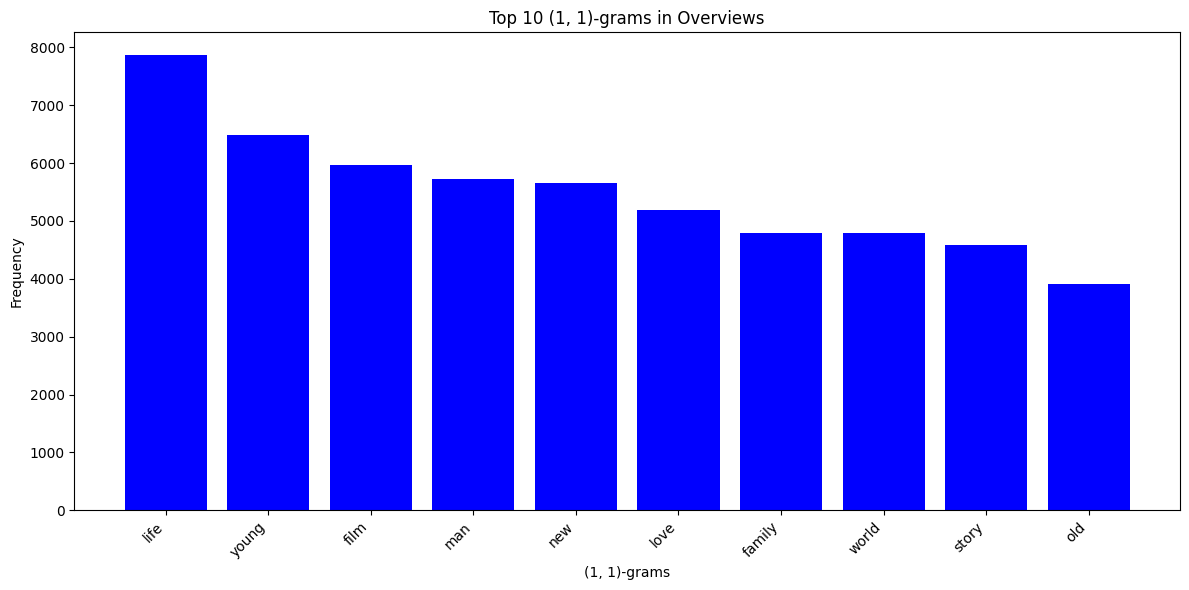

In [52]:
plot_top_keywords(overview, n=10, ngram_range=(1, 1), plot_color='blue')

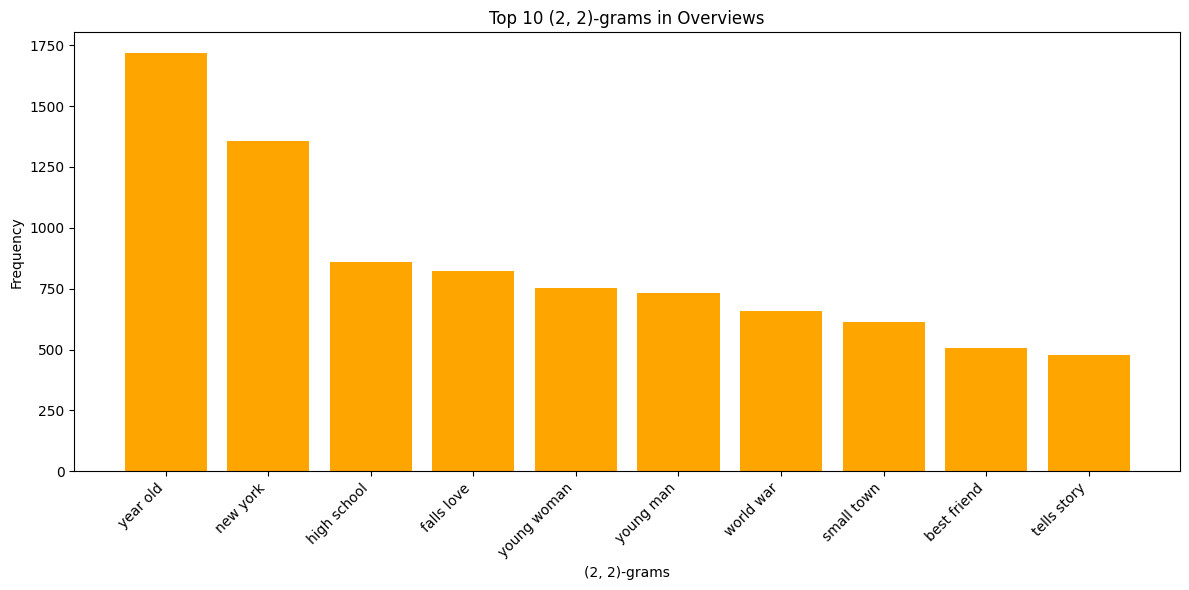

In [54]:
plot_top_keywords(overview, n=10, ngram_range=(2, 2), plot_color='orange')

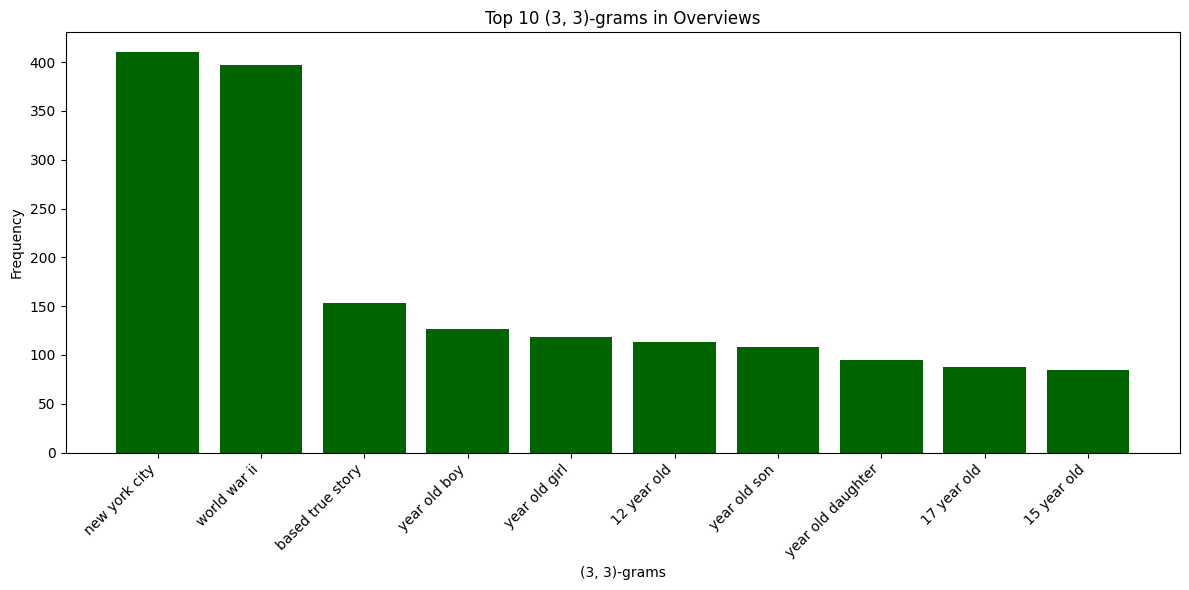

In [55]:
plot_top_keywords(overview, n=10, ngram_range=(3, 3), plot_color='darkgreen')

In [56]:
del overview

In [104]:
del duplicated_overviews, duplicates_to_drop, overview_value_counts, overviews_to_drop

### popularity

In [107]:
get_non_null_element(df_meta['popularity'], 5)

10.850442
0.3785
0.858991
2.026942
0.0339


In [111]:
df_meta['popularity'].astype('float64').describe()

count    44272.000000
mean         2.980734
std          6.070872
min          0.000000
25%          0.405805
50%          1.165050
75%          3.826252
max        547.488298
Name: popularity, dtype: float64

In [112]:
df_meta['popularity'] = df_meta['popularity'].astype('float64')

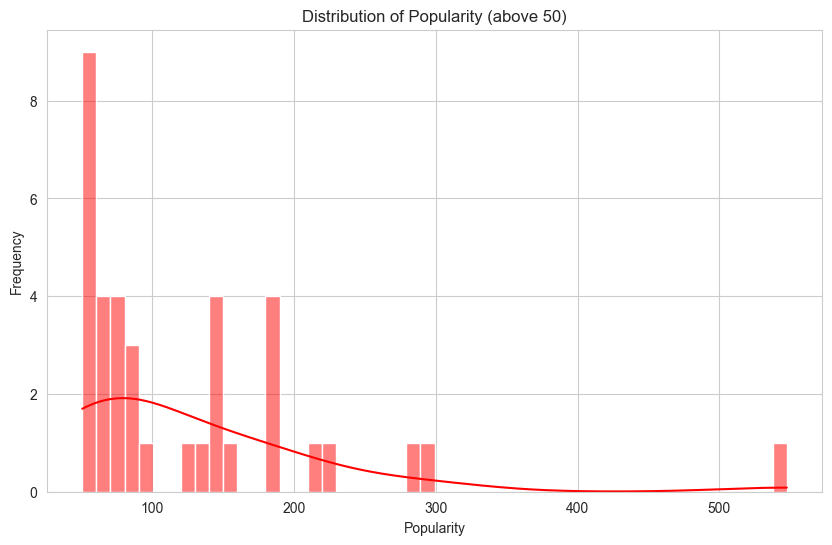

In [132]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(df_meta[df_meta['popularity']>50]['popularity'].dropna(), kde=True, color='red', bins=50)

plt.xlabel('Popularity')
plt.ylabel('Frequency')
plt.title('Distribution of Popularity (above 50)')

plt.show()

### production_companies

In [131]:
get_non_null_element(df_meta['production_companies'], 5)

[{'name': 'CineSon Entertainment', 'id': 16647}, {'name': 'Look at the Moon Productions', 'id': 16649}]
[{'name': 'Flying Eye Productions', 'id': 74659}]
[{'name': 'Oscilloscope Laboratories', 'id': 4748}, {'name': 'Good Machine', 'id': 10565}]
[{'name': 'Walt Disney Pictures', 'id': 2}, {'name': 'Jerry Bruckheimer Films', 'id': 130}, {'name': 'Second Mate Productions', 'id': 19936}]
[{'name': 'Continental Motion Pictures', 'id': 18054}, {'name': 'M&C Films', 'id': 18055}, {'name': 'Royal Films', 'id': 18056}]


In [134]:
for i, row in df_meta.dropna(subset=['production_companies']).iterrows():
    companies_final = []

    companies_list = ast.literal_eval(row['production_companies'])
    for companies_dict in companies_list:
        companies_final.append(companies_dict['name'])
    df_meta.at[i, 'production_companies'] = companies_final

In [135]:
df_meta['production_companies'].head(5)

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
3             [Twentieth Century Fox Film Corporation]
4         [Sandollar Productions, Touchstone Pictures]
Name: production_companies, dtype: object

In [136]:
del i, row, companies_dict, companies_final, companies_list

### production_countries

In [141]:
get_non_null_element(df_meta['production_countries'], 5)

[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'IT', 'name': 'Italy'}]
[{'iso_3166_1': 'US', 'name': 'United States of America'}]
[{'iso_3166_1': 'GB', 'name': 'United Kingdom'}]


In [142]:
for i, row in df_meta.dropna(subset=['production_countries']).iterrows():
    countries_final = []

    countries_list = ast.literal_eval(row['production_countries'])
    for countries_dict in countries_list:
        countries_final.append(countries_dict['iso_3166_1'])
    df_meta.at[i, 'production_countries'] = countries_final

In [148]:
df_meta['production_countries'].tail(5)

45461    [IR]
45462    [PH]
45463    [US]
45464    [RU]
45465    [GB]
Name: production_countries, dtype: object

In [149]:
df_meta['production_countries'].value_counts()

production_countries
[US]                17781
[]                   5949
[GB]                 2227
[FR]                 1557
[JP]                 1343
                    ...  
[CN, HK, KR]            1
[DE, FR, TR]            1
[PL, FR, CH]            1
[NL, AR, FR, DE]        1
[EG, IT, US]            1
Name: count, Length: 2364, dtype: int64

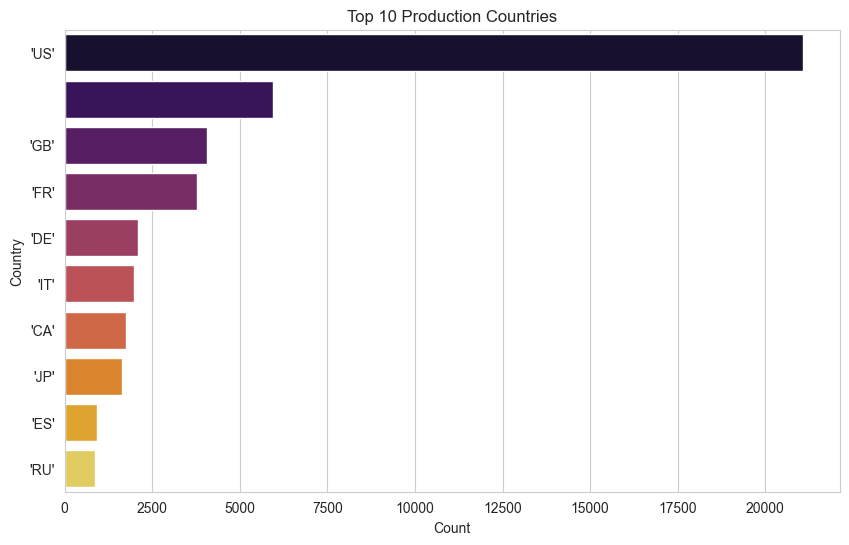

In [189]:
country_counts = df_meta['production_countries'].astype(str).str.strip('[]').str.split(',')
country_list = [country.strip() for sublist in country_counts for country in sublist]
country_series = pd.Series(country_list)
top_10_countries = country_series.value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_countries.values, y=top_10_countries.index, palette='inferno')

plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 10 Production Countries')

plt.show()

In [144]:
del i, row, countries_dict, countries_final, countries_list

In [156]:
del country_counts, country_list, country_series, top_10_countries

### release_date

In [145]:
get_non_null_element(df_meta['release_date'], 5)

1999-10-01
2015-09-18
2011-07-26
1978-02-08
2013-03-03


In [146]:
df_meta['release_date'] = pd.to_datetime(df_meta['release_date'])

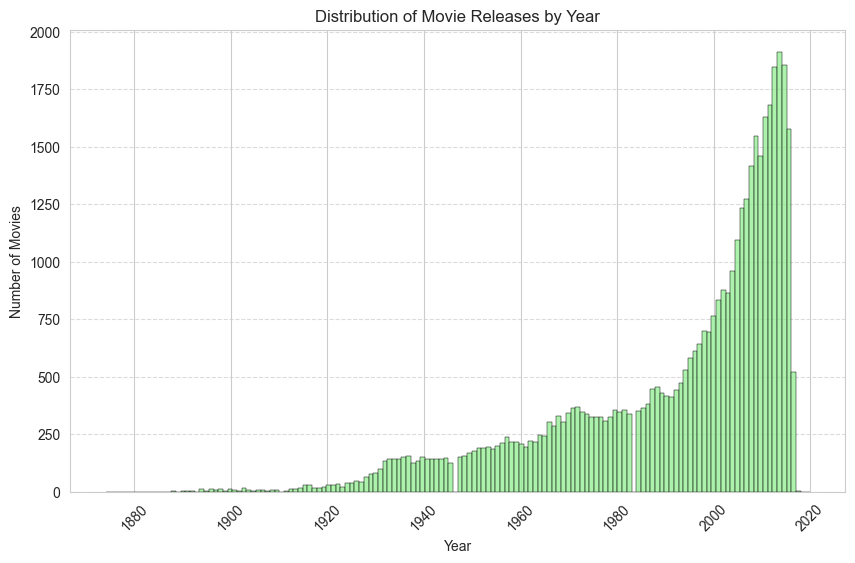

In [186]:
df_meta['release_year'] = df_meta['release_date'].dt.year

plt.figure(figsize=(10, 6))
sns.histplot(df_meta['release_year'], bins=150, color='lightgreen', edgecolor='black')
plt.title('Distribution of Movie Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

### runtime

In [172]:
get_non_null_element(df_meta['runtime'], 10)

101.0
95.0
93.0
82.0
100.0
102.0
10.0
88.0
65.0
110.0


In [183]:
df_meta['runtime'] = df_meta['runtime'].astype('float64')

In [185]:
df_meta['runtime'].describe()

count    44272.000000
mean        95.001649
std         37.531859
min          0.000000
25%         85.000000
50%         95.000000
75%        107.000000
max       1256.000000
Name: runtime, dtype: float64

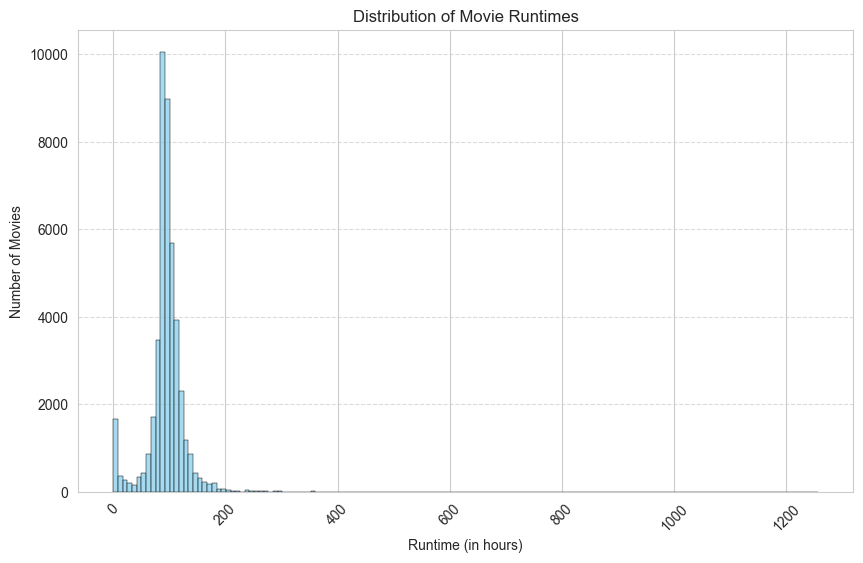

In [187]:
plt.figure(figsize=(10, 6))
sns.histplot(df_meta['runtime'], bins=150, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Runtimes')
plt.xlabel('Runtime (in hours)')
plt.ylabel('Number of Movies')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.show()

### spoken_languages

In [188]:
get_non_null_element(df_meta['spoken_languages'], 5)

[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]
[{'iso_639_1': 'it', 'name': 'Italiano'}, {'iso_639_1': 'de', 'name': 'Deutsch'}]
[{'iso_639_1': 'en', 'name': 'English'}]
[{'iso_639_1': 'en', 'name': 'English'}]


In [191]:
for i, row in df_meta.dropna(subset=['spoken_languages']).iterrows():
    languages_final = []

    languages_list = ast.literal_eval(row['spoken_languages'])
    for languages_dict in languages_list:
        languages_final.append(languages_dict['iso_639_1'])
    df_meta.at[i, 'spoken_languages'] = languages_final

In [192]:
df_meta['spoken_languages'].tail(5)

45461    [fa]
45462    [tl]
45463    [en]
45464      []
45465    [en]
Name: spoken_languages, dtype: object

In [194]:
df_meta['spoken_languages'].value_counts()

spoken_languages
[en]                    22279
[]                       3546
[fr]                     1719
[ja]                     1280
[it]                     1038
                        ...  
[zh, en, ja]                1
[en, ja, ar, zh]            1
[fr, la, mn, pt, en]        1
[es, he, en]                1
[ff, en]                    1
Name: count, Length: 1919, dtype: int64

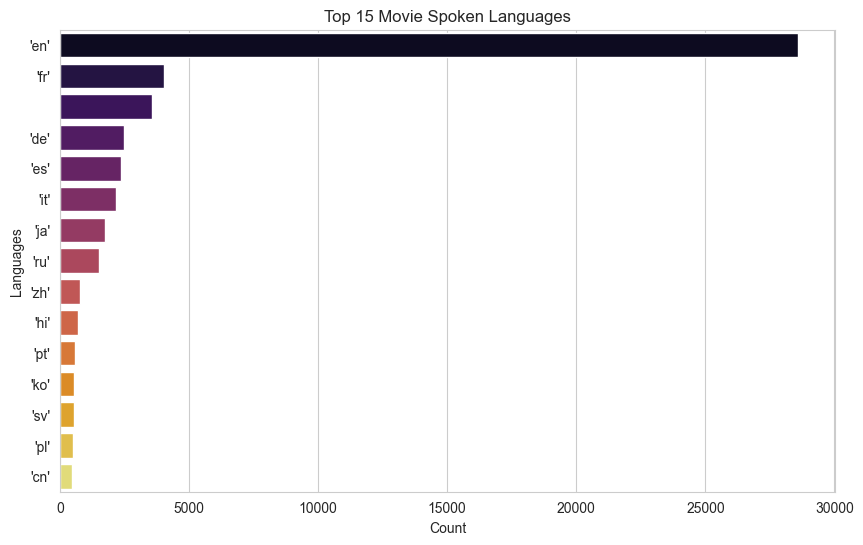

In [193]:
languages_counts = df_meta['spoken_languages'].astype(str).str.strip('[]').str.split(',')
languages_list = [languages.strip() for sublist in languages_counts for languages in sublist]
languages_series = pd.Series(languages_list)
top_15_languages = languages_series.value_counts().head(15)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_15_languages.values, y=top_15_languages.index, palette='inferno')

plt.xlabel('Count')
plt.ylabel('Languages')
plt.title('Top 15 Movie Spoken Languages')

plt.show()

In [195]:
del languages_counts, languages_dict, languages_final, languages_list, languages_series
del top_10_countries, top_10_genres, top_15_languages

### tagline

In [197]:
get_non_null_element(df_meta['tagline'], 5)

If you can't find the perfect guy, make one!
A physical comedy about yearning
Don't throw them away. Bring them here.
They were looking for the American Deream. . . They found the American Nightmare.
All they wanted was a little getaway. All they got was nothing but trouble.


### title

In [198]:
get_non_null_element(df_meta['title'], 5)

Desperado's Duel
The Phantom
Sky Line
Raja Natwarlal
Part of the Weekend Never Dies


In [199]:
df_meta['title'].duplicated().sum()

3081

In [200]:
duplicated_title = df_meta[df_meta.duplicated(subset=['title'], keep=False)]

In [201]:
duplicated_title['title'].value_counts()

title
Cinderella               11
Hamlet                    9
Beauty and the Beast      8
Les Misérables            8
Alice in Wonderland       8
                         ..
The Sunshine Boys         2
Going in Style            2
High Risk                 2
Anna                      2
A Long and Happy Life     2
Name: count, Length: 2267, dtype: int64

### video

In [203]:
get_non_null_element(df_meta['video'], 5)

False
False
False
False
False


In [204]:
df_meta['video'].value_counts()

video
False    44184
True        88
Name: count, dtype: int64

In [205]:
df_meta.drop(columns=['video'], inplace=True)

### vote_average

In [206]:
get_non_null_element(df_meta['vote_average'], 5)

5.5
7.5
5.8
5.8
5.8


In [207]:
df_meta['vote_average'] = df_meta['vote_average'].astype('float64')

In [208]:
df_meta['vote_average'].describe()

count    44272.000000
mean         5.642795
std          1.894048
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64

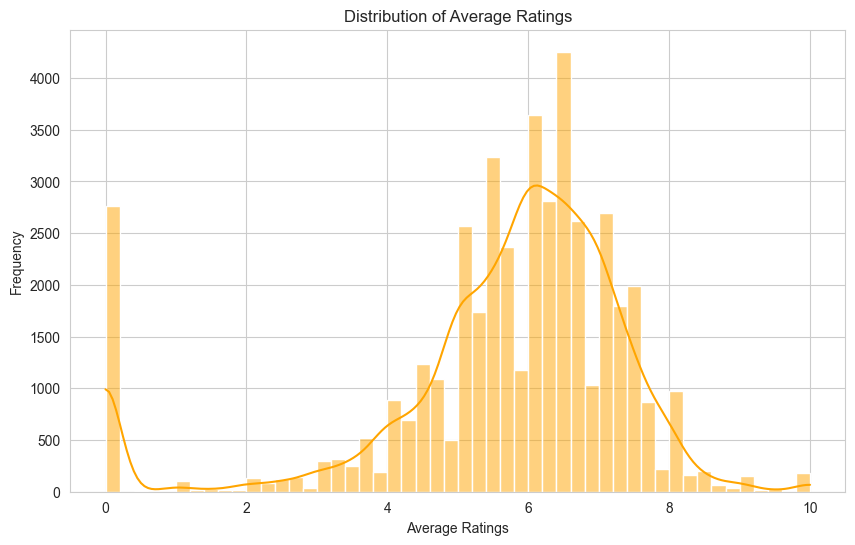

In [215]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(df_meta['vote_average'].dropna(), kde=True, color='orange', bins=50)

plt.xlabel('Average Ratings')
plt.ylabel('Frequency')
plt.title('Distribution of Average Ratings')

plt.show()

### vote_count

In [216]:
get_non_null_element(df_meta['vote_count'], 5)

10.0
29.0
18.0
0.0
2.0


In [221]:
df_meta['vote_count'] = df_meta['vote_count'].astype('float64')

In [222]:
df_meta['vote_count'].describe()

count    44272.000000
mean       112.528483
std        497.536730
min          0.000000
25%          3.000000
50%         10.000000
75%         35.000000
max      14075.000000
Name: vote_count, dtype: float64

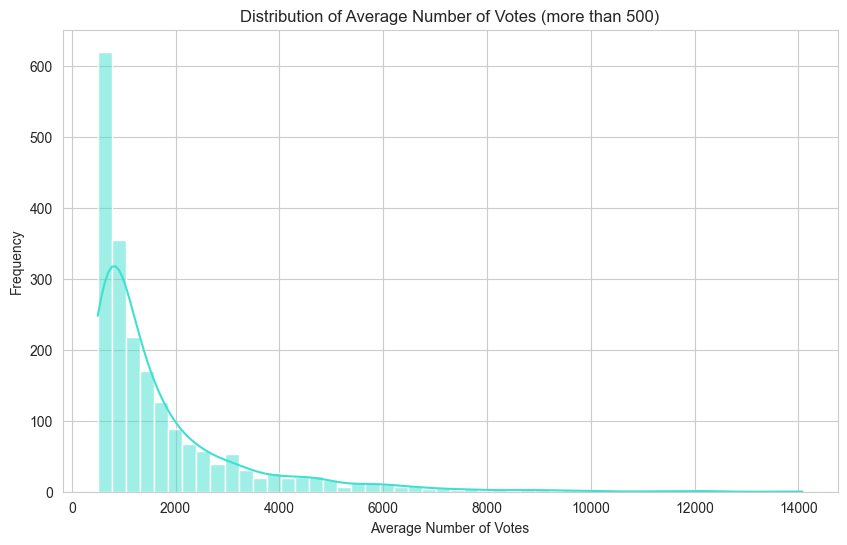

In [234]:
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

sns.histplot(df_meta[df_meta['vote_count']>500]['vote_count'].dropna(), kde=True, color='turquoise', bins=50)

plt.xlabel('Average Number of Votes')
plt.ylabel('Frequency')
plt.title('Distribution of Average Number of Votes (more than 500)')

plt.show()

In [235]:
len(df_meta)

44275

In [237]:
df_meta.info()

<class 'pandas.core.frame.DataFrame'>
Index: 44275 entries, 0 to 45465
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   adult                  44275 non-null  object        
 1   belongs_to_collection  4400 non-null   object        
 2   genres                 44275 non-null  object        
 3   id                     44275 non-null  object        
 4   original_language      44265 non-null  object        
 5   original_title         44275 non-null  object        
 6   overview               44275 non-null  object        
 7   popularity             44272 non-null  float64       
 8   poster_path            43935 non-null  object        
 9   production_companies   44272 non-null  object        
 10  production_countries   44272 non-null  object        
 11  release_date           44201 non-null  datetime64[ns]
 12  runtime                44272 non-null  float64       
 13  spoken

In [239]:
df_meta.isna().sum()

adult                        0
belongs_to_collection    39875
genres                       0
id                           0
original_language           10
original_title               0
overview                     0
popularity                   3
poster_path                340
production_companies         3
production_countries         3
release_date                74
runtime                      3
spoken_languages             3
tagline                  23899
title                        3
vote_average                 3
vote_count                   3
release_year                74
dtype: int64

## Keywords Analysis

In [3]:
df_keywords = pd.read_csv('../Data/keywords.csv', low_memory=True)

In [5]:
df_keywords.head(3)

,id,keywords
0,862,"[{'id': 931, 'name': 'jealousy'}, {'id': 4290,..."
1,8844,"[{'id': 10090, 'name': 'board game'}, {'id': 1..."
2,15602,"[{'id': 1495, 'name': 'fishing'}, {'id': 12392..."


In [6]:
df_keywords.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [7]:
df_keywords.isna().sum()

id          0
keywords    0
dtype: int64

In [20]:
get_non_null_element(df_keywords['keywords'], 1)

[{'id': 549, 'name': 'prostitute'}, {'id': 2604, 'name': 'babysitter'}, {'id': 5902, 'name': 'escort service'}, {'id': 6270, 'name': 'high school'}, {'id': 208640, 'name': 'lifetime'}, {'id': 228523, 'name': 'inspired by true events'}]


In [26]:
for i, row in df_keywords.dropna(subset=['keywords']).iterrows():
    keywords_final = []

    keywords_list = ast.literal_eval(row['keywords'])
    for keywords_dict in keywords_list:
        keywords_final.append(keywords_dict['name'])
    df_keywords.at[i, 'keywords'] = keywords_final

In [28]:
df_keywords.head(5)

,id,keywords
0,862,"[jealousy, toy, boy, friendship, friends, riva..."
1,8844,"[board game, disappearance, based on children'..."
2,15602,"[fishing, best friend, duringcreditsstinger, o..."
3,31357,"[based on novel, interracial relationship, sin..."
4,11862,"[baby, midlife crisis, confidence, aging, daug..."


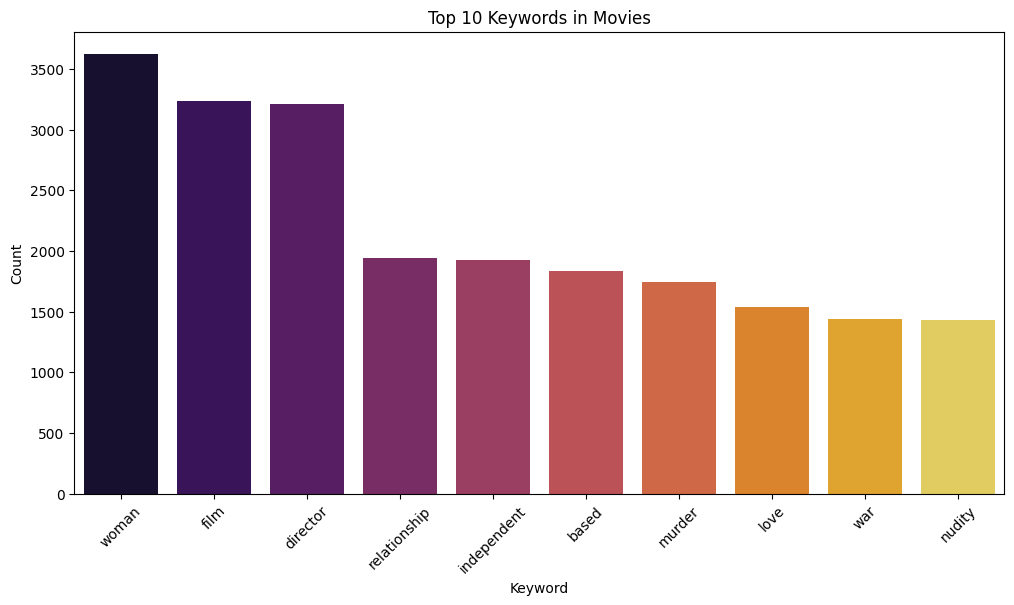

In [39]:
df_keywords['keywords_str'] = df_keywords['keywords'].apply(lambda x: ' '.join(x))

vectorizer = CountVectorizer(stop_words='english', min_df=2, lowercase=True)
keywords_matrix = vectorizer.fit_transform(df_keywords['keywords_str'])
feature_names = vectorizer.get_feature_names_out()
keyword_counts = keywords_matrix.sum(axis=0).A1

keywords_df = pd.DataFrame({'Keyword': feature_names, 'Count': keyword_counts})
keywords_df = keywords_df.sort_values(by='Count', ascending=False)
top_10_keywords = keywords_df.head(10)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_keywords, x='Keyword', y='Count', palette='inferno')
plt.title('Top 10 Keywords in Movies')
plt.xlabel('Keyword')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [83]:
del vectorizer, keyword_counts, keywords_df, keywords_dict, keywords_final, keywords_list, keywords_matrix
del top_10_keywords, feature_names

In [63]:
len(df_meta), len(df_keywords)

(44275, 46419)

In [67]:
df_keywords = df_keywords[df_keywords['id'].isin(df_meta['id'])]

In [68]:
len(df_keywords)

45215

In [69]:
duplicated_ids = df_keywords[df_keywords.duplicated(subset=['id'], keep=False)]

In [70]:
duplicated_ids['id'].value_counts()

id
159849    3
141971    3
105045    2
255396    2
319888    2
         ..
159109    2
354216    2
376358    2
174751    2
86186     2
Name: count, Length: 939, dtype: int64

In [74]:
df_keywords = df_keywords.drop_duplicates(subset=['id'], keep='first')

In [78]:
len(df_keywords), len(df_meta)

(44274, 44275)

In [77]:
df_keywords['id'].duplicated().sum(), df_meta['id'].duplicated().sum()

(0, 0)

In [85]:
meta_ids = set(df_meta['id'])
keywords_ids = set(df_keywords['id'])

missing_ids = meta_ids.difference(keywords_ids)

print("IDs from df_meta not present in df_keywords:", missing_ids)

IDs from df_meta not present in df_keywords: {401840}


In [86]:
df_meta.loc[df_meta['id'] == 401840]

,Unnamed: 0,adult,belongs_to_collection,genres,id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,tagline,title,vote_average,vote_count,release_year
41832,42883,False,NaN,[],401840,es,School's out,Two high school kids mentored by a nightclub o...,0.207775,/4JI7Ica5I54xrU5T5htx9LwhHcV.jpg,[],[],2017-05-30,0.0,[],NaN,School's out,0.0,0.0,2017.0


In [87]:
df_meta = df_meta[df_meta['id'].isin(df_keywords['id'])]

In [88]:
len(df_keywords), len(df_meta)

(44274, 44274)

In [89]:
del meta_ids, keywords_ids, missing_ids

## Credits Analysis

In [111]:
df_credits = pd.read_csv('../Data/credits.csv', low_memory=True)

In [112]:
df_credits.head(3)

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602


In [113]:
df_credits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [114]:
df_credits.isna().sum()

cast    0
crew    0
id      0
dtype: int64

### cast

In [115]:
get_non_null_element(df_credits['cast'], 1)

[{'cast_id': 1, 'character': 'Himself', 'credit_id': '5708ed8cc3a3681d3000349d', 'gender': 2, 'id': 1603156, 'name': 'Andrew Bolton', 'order': 0, 'profile_path': None}, {'cast_id': 2, 'character': 'Himself', 'credit_id': '5708edf2c3a3681d32002d0d', 'gender': 2, 'id': 12453, 'name': 'Wong Kar-wai', 'order': 1, 'profile_path': '/zLngBAag9DSKtSAOWcfsFtEU3i5.jpg'}, {'cast_id': 3, 'character': 'Himself', 'credit_id': '5708ee099251415bcf002b5f', 'gender': 2, 'id': 147057, 'name': 'Karl Lagerfeld', 'order': 2, 'profile_path': '/n7BjpKNyBMr7tiVJ8XRxfkYxj9i.jpg'}, {'cast_id': 7, 'character': 'Herself', 'credit_id': '5708ee5092514170fc0002d0', 'gender': 1, 'id': 131519, 'name': 'Rihanna', 'order': 3, 'profile_path': '/ssguCAeEMq74FS2ICMJ3Q9Wy7Bf.jpg'}, {'cast_id': 4, 'character': 'Herself', 'credit_id': '5708ee1bc3a3681d24002f7c', 'gender': 0, 'id': 89815, 'name': 'Anna Wintour', 'order': 4, 'profile_path': '/lded0oYuBBIJJq5RoN8NOQETPtq.jpg'}, {'cast_id': 5, 'character': 'Himself', 'credit_id': 

In [116]:
for i, row in df_credits.dropna(subset=['cast']).iterrows():
    cast_final = []

    cast_count = 0
    cast_list = ast.literal_eval(row['cast'])
    for cast_dict in cast_list:
        cast_final.append(cast_dict['name'])
        cast_count+=1
        if cast_count>=3:
            break
    df_credits.at[i, 'cast'] = cast_final

In [117]:
df_credits['cast'].head(5)

0                  [Tom Hanks, Tim Allen, Don Rickles]
1       [Robin Williams, Jonathan Hyde, Kirsten Dunst]
2           [Walter Matthau, Jack Lemmon, Ann-Margret]
3    [Whitney Houston, Angela Bassett, Loretta Devine]
4           [Steve Martin, Diane Keaton, Martin Short]
Name: cast, dtype: object

In [118]:
cast_frequencies = defaultdict(int)

for cast_list in df_credits['cast']:
    for cast in cast_list:
        cast_frequencies[cast] += 1

cast_frequency_dict = dict(cast_frequencies)

In [119]:
print("Total unique casts: ", len(cast_frequency_dict))

Total unique casts:  47481


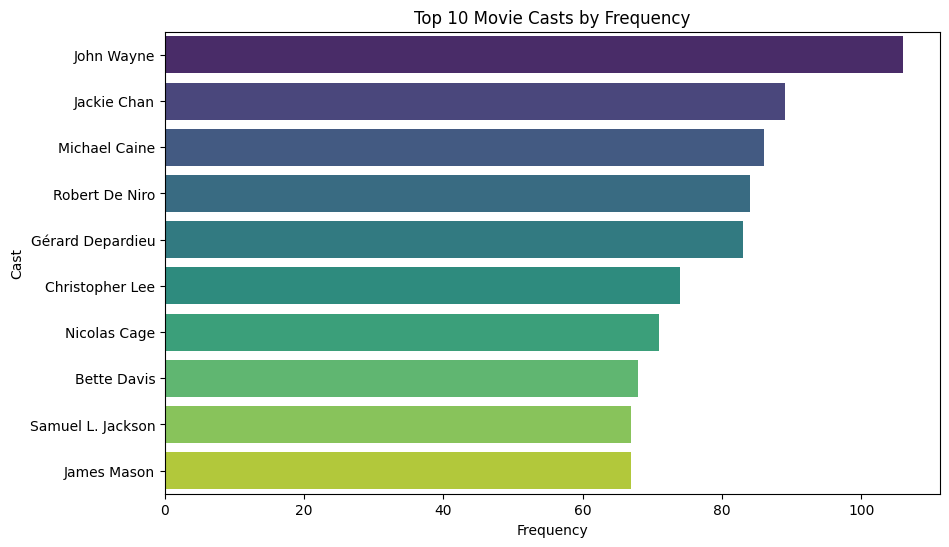

In [120]:
cast_frequency_df = pd.DataFrame(list(cast_frequency_dict.items()), columns=['Cast', 'Frequency'])

cast_frequency_df = cast_frequency_df.sort_values(by='Frequency', ascending=False)

top_10_cast = cast_frequency_df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Cast', data=top_10_cast, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Cast')
plt.title('Top 10 Movie Casts by Frequency')
plt.show()

In [121]:
del cast, cast_count, cast_dict, cast_final, cast_list, cast_frequencies, cast_frequency_dict
del cast_frequency_df, top_10_cast

### crew

In [126]:
get_non_null_element(df_credits['crew'], 1)

[{'credit_id': '58f32d60c3a36807df00d300', 'department': 'Production', 'gender': 2, 'id': 2304, 'job': 'Producer', 'name': 'Anatole Dauman', 'profile_path': None}, {'credit_id': '58f32d88c3a368083500df1a', 'department': 'Production', 'gender': 0, 'id': 11985, 'job': 'Producer', 'name': 'Philippe Lifchitz', 'profile_path': None}, {'credit_id': '52fe491b9251416c910a2e8b', 'department': 'Directing', 'gender': 0, 'id': 230554, 'job': 'Director', 'name': 'Edgar Morin', 'profile_path': None}, {'credit_id': '58f32d2a9251413da700e126', 'department': 'Writing', 'gender': 0, 'id': 230554, 'job': 'Writer', 'name': 'Edgar Morin', 'profile_path': None}, {'credit_id': '52fe491b9251416c910a2e91', 'department': 'Directing', 'gender': 2, 'id': 238960, 'job': 'Director', 'name': 'Jean Rouch', 'profile_path': None}, {'credit_id': '58f32d1fc3a368083500deb5', 'department': 'Writing', 'gender': 2, 'id': 238960, 'job': 'Writer', 'name': 'Jean Rouch', 'profile_path': None}]


In [127]:
for i, row in df_credits.dropna(subset=['crew']).iterrows():
    crew_final = []

    crew_list = ast.literal_eval(row['crew'])
    for crew_dict in crew_list:
        if crew_dict['job'] == "Director":
            crew_final.append(crew_dict['name'])
    df_credits.at[i, 'crew'] = crew_final

In [128]:
df_credits['crew'].head(5)

0      [John Lasseter]
1       [Joe Johnston]
2      [Howard Deutch]
3    [Forest Whitaker]
4      [Charles Shyer]
Name: crew, dtype: object

In [129]:
director_frequencies = defaultdict(int)

for director_list in df_credits['crew']:
    for director in director_list: 
        director_frequencies[director] += 1

director_frequency_dict = dict(director_frequencies)

In [130]:
print("Total unique directors: ", len(director_frequency_dict))

Total unique directors:  19740


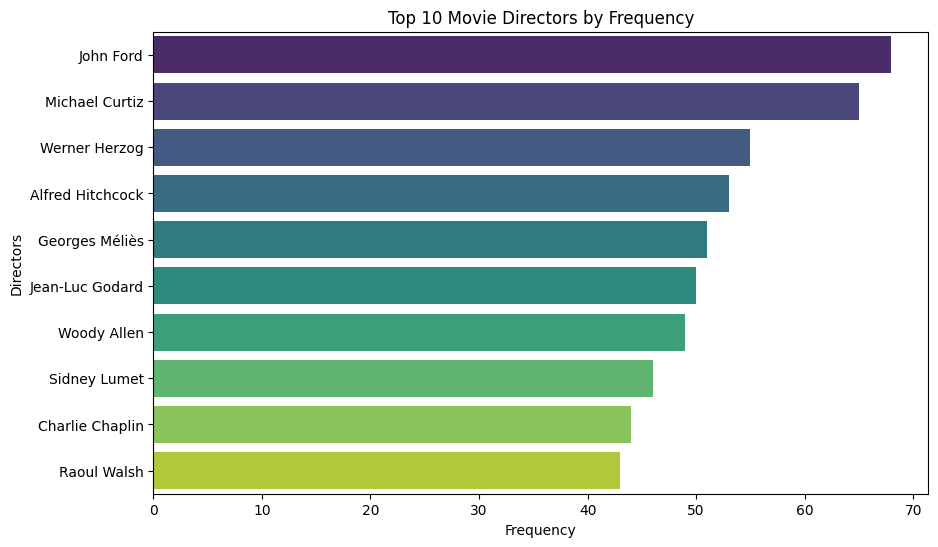

In [131]:
director_frequency_df = pd.DataFrame(list(director_frequency_dict.items()), columns=['Director', 'Frequency'])

director_frequency_df = director_frequency_df.sort_values(by='Frequency', ascending=False)

top_10_director = director_frequency_df.head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Frequency', y='Director', data=top_10_director, palette='viridis')
plt.xlabel('Frequency')
plt.ylabel('Directors')
plt.title('Top 10 Movie Directors by Frequency')
plt.show()

In [132]:
del director, director_frequencies, director_frequency_df, director_frequency_dict, director_list
del top_10_director, i, row, crew_dict, crew_final, crew_list

In [133]:
len(df_credits), len(df_meta)

(45476, 44274)

In [136]:
df_credits = df_credits[df_credits['id'].isin(df_meta['id'])]

In [137]:
len(df_credits), len(df_meta)

(44317, 44274)

In [138]:
df_credits['id'].duplicated().sum()

43

In [143]:
df_credits = df_credits.drop_duplicates(subset=['id'], keep='first')

In [144]:
len(df_credits), len(df_meta)

(44274, 44274)

In [146]:
len(df_meta[df_meta['id'].isin(df_credits['id'])])

44274

In [152]:
df_credits.to_csv('../Clean_Data/clean_credits.csv')
df_keywords.to_csv('../Clean_Data//clean_keywords.csv')
df_meta.to_csv('../Clean_Data/clean_metadata.csv')